## Predicting Apple's Stock Price.
- In this Data Science Project we will create a Linear Regression model and a Decision Tree Regression model to predict Apple's Stock Price using Machine Learning and Python.

In [1]:
import pandas as pd
apple = pd.read_csv('AAPL.csv')
print(apple.head())

   Unnamed: 0 symbol                       date    close     high     low  \
0           0   AAPL  2015-05-27 00:00:00+00:00  132.045  132.260  130.05   
1           1   AAPL  2015-05-28 00:00:00+00:00  131.780  131.950  131.10   
2           2   AAPL  2015-05-29 00:00:00+00:00  130.280  131.450  129.90   
3           3   AAPL  2015-06-01 00:00:00+00:00  130.535  131.390  130.05   
4           4   AAPL  2015-06-02 00:00:00+00:00  129.960  130.655  129.32   

     open    volume    adjClose     adjHigh      adjLow     adjOpen  \
0  130.34  45833246  121.682558  121.880685  119.844118  120.111360   
1  131.86  30733309  121.438354  121.595013  120.811718  121.512076   
2  131.23  50884452  120.056069  121.134251  119.705890  120.931516   
3  131.20  32112797  120.291057  121.078960  119.844118  120.903870   
4  129.86  33667627  119.761181  120.401640  119.171406  119.669029   

   adjVolume  divCash  splitFactor  
0   45833246      0.0          1.0  
1   30733309      0.0          1.0  

In [2]:
# To get Number of Training days

print('training days =',apple.shape)

training days = (1258, 15)


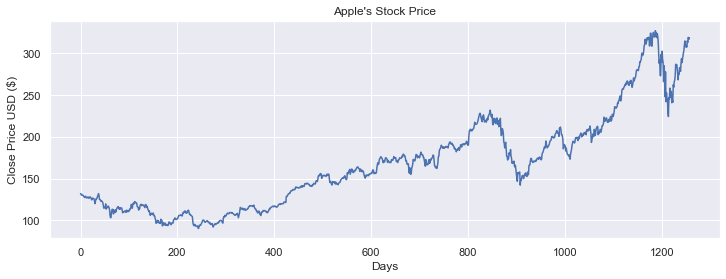

In [7]:
# To Visualize the close price data

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(12, 4))
plt.title("Apple's Stock Price")
plt.xlabel("Days")          
plt.ylabel("Close Price USD ($)")
plt.plot(apple["close"])

plt.show()

In [8]:
# To get the close price:

apple = apple[["close"]]
print(apple.head())

     close
0  132.045
1  131.780
2  130.280
3  130.535
4  129.960


**Creating a variable to predict 'X' days in the future**

In [9]:
futureDays = 25

### Creating a new target column shifted 'X' units/Days up:

In [10]:
apple["Prediction"] = apple[['close']].shift(-futureDays)
print(apple.head())
print(apple.tail())

     close  Prediction
0  132.045      126.60
1  131.780      126.44
2  130.280      126.00
3  130.535      125.69
4  129.960      122.57
       close  Prediction
1253  314.96         NaN
1254  313.14         NaN
1255  319.23         NaN
1256  316.85         NaN
1257  318.89         NaN


<ipython-input-10-6fe6ff287b6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple["Prediction"] = apple[['close']].shift(-futureDays)


#### To create a feature dataset (x) and convert into a numpy array and remove last 'x' rows/days:

In [11]:
import numpy as np

x = np.array( apple.drop(['Prediction'], 1))[:-futureDays]
print(x)

[[132.045]
 [131.78 ]
 [130.28 ]
 ...
 [284.43 ]
 [286.69 ]
 [282.8  ]]


#### To create a target dataset (y) and convert it into a numpy array and get all of the target values except the last 'x' rows/days:

In [12]:
y = np.array(apple['Prediction'])[:-futureDays]
print(y)

[126.6  126.44 126.   ... 319.23 316.85 318.89]


### Split the data into Training and Testing

In [13]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33)

## Creating Models

In [14]:
# creating the decision tree regressor model

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(xtrain, ytrain)

# Creating the linear Regression Model

from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(xtrain, ytrain)

In [17]:
#### To get the last 'x' rows/days of the feature dataset:

xfuture = apple.drop(['Prediction'], 1)[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)

print(xfuture)

[[277.97]
 [242.21]
 [252.86]
 [246.67]
 [244.78]
 [229.24]
 [224.37]
 [246.88]
 [245.52]
 [258.44]
 [247.74]
 [254.81]
 [254.29]
 [240.91]
 [244.93]
 [241.41]
 [262.47]
 [259.43]
 [266.07]
 [267.99]
 [273.25]
 [287.05]
 [284.43]
 [286.69]
 [282.8 ]]


## To see the model tree prediction

In [19]:
treePrediction = tree.predict(xfuture)
print('Decision Tree Prediction=', treePrediction)

Decision Tree Prediction= [276.93 268.37 276.1  275.03 310.13 283.17 261.96 287.73 293.8  289.07
 282.8  300.63 300.63 303.74 310.13 315.01 279.44 275.15 309.54 307.71
 241.41 316.85 319.23 316.85 318.89]


## To see the model linear regression prediction

In [20]:
linearPrediction = linear.predict(xfuture)
print('Linear Regression Prediction=', linearPrediction)

Linear Regression Prediction= [281.52009124 245.76837428 256.41590743 250.22734121 248.33777899
 232.8013785  227.93250653 250.43729257 249.07760759 261.99461494
 251.29709337 258.36545576 257.8455762  244.46867539 248.48774425
 244.96855958 266.02368148 262.98438563 269.62284762 271.54240289
 276.80118453 290.59798805 287.97859492 290.23807144 286.34897247]


## Visualize decision tree predictions

<ipython-input-24-7f0e0c9ac093>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


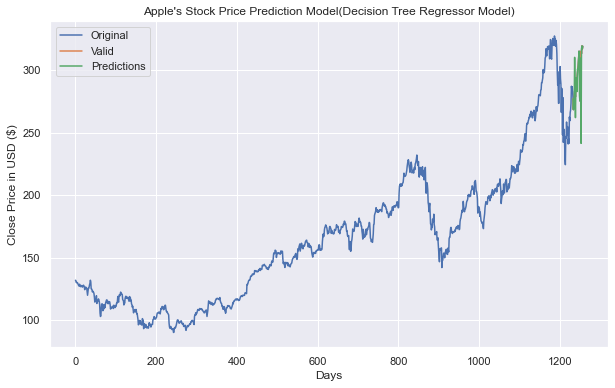

In [24]:
predictions = treePrediction
valid = apple[x.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize=(10, 6))
plt.title("Apple's Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel('Days')
plt.ylabel('Close Price in USD ($)')
plt.plot(apple['close'])
plt.plot(valid[['close','Predictions']])
plt.legend(['Original', 'Valid', 'Predictions'])

plt.show()

## Visualize the Linear Model Predictions

<ipython-input-25-1d06170b352f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


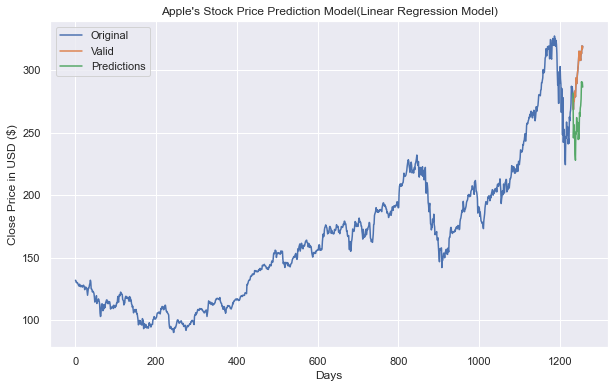

In [25]:
predictions = linearPrediction
valid = apple[x.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize=(10,6))
plt.title("Apple's Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel('Days')
plt.ylabel('Close Price in USD ($)')
plt.plot(apple['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Original', 'Valid', 'Predictions'])

plt.show()

### Valid graph represents values of the validation set.